C-Band thermal circuit
====
Last updated: 28 Oct 2018  

This notebook will calculate values to be used in the C-Band thermal circuit. The RF front end has six QPL9503 amplifiers per antenna element.  These are each biased at 5 volts DC with a typical Idd of 56mA. The self-heating will affect the noise figure and gain of the amplifier.  Assuming some symmetry in the layout of the components, only three amplifiers  will be analyzed.  The thermal conductive path is through the various layers of the antenna physical structure.  

Most calculations in the notebook are performed with units attached to the values using the python pint unit library.  

The thermal conductivity of copper is coded as a function of temperature.  The average thermal conductivity of copper over the temperature range of interest is calculated and the average thermal conductivity is used in calculations.  Data for thermal conductivity of other materials was not available, so the published value was used.  In some cases the value of thermal conductivity used is for a different temperature, so it is assmed that the thermal condivity is constant over the range of temperatures of interest.  

C-Band: 1536 elements  
3100 Watts
135 Watts/sqft

Fan: Amtek Rotrom 41.7 cfm derated by 40%  
1/2 array tile module  

Antenna LRU stack  

Top and Network CCA (top CCA): patch, QPL9503  
Top and Network lattice, front or top eggcreate  

Base CCA: QPL9503
Base lattice, lower eggcreate or rear eggcreate  

Driver CCA: QPL9503  
Backshell  
Antenna support structure (ASP)  
heat sink
Fan

Between support structure is Q-pad-II.

Materials:  
PWB is Rogers 4350  
all copper is 1 oz, 0.0014" thick  
all vias are 0.010 OD, plated with 1 oz copper to and ID of 0.72"  
three thernal vias under each LNA  
Along perhiphery of unit cell thermal via spacing is 0.1"  
unit cell wall is 0.70" thick  
mechanical intreface between lattice abd CCAs is SilPad Q-pad-II at 10 psi, thermal impedance of 0.52 C-in2/W  

see page 12 for thernal material conductivities used  

unit cell is x=1.3", y=0.85", number of peripheral vias=43  

copper traces,  and vias to a ground plane.  It is assumed that a heat frame will conduct the thermal energy to the ambient environment.  To analyze without the heat frame, the thermal contact resistant is set to 50 C/W.  

The ambient environment  is either, -55C, -34C or 70C for this analysis.

## Reference:
(1) Heat Transfer, A Practical Approach, 2nd Edition, by Yunus Cengel  

## Comments:  
PCB layers in the LRU are not named consitently.  
Aluminum thermal conductivity value should be for alloy used.
fan and airflow, Raytheon uses 40% derating, is this enough for altitude?  seems arbitrary, need justification for 40%  why not some other value??

Need value for thickness of Backshell  

page 4: C-Band is 3100 watts, total power used by LNAs is 2580, unit cell thermal model is missing 520/1536=0.33 watts?
page 12: why are unit cell size different than spreadsheet?
page 14: what about thernal input from neighbor unit cells?

page 18: heatsink is fin radiator to air, need to consider mass density of air??  heatsink part is a place holder and not actually integrated into the design.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# use the pint library to keep track of physical units
import pint
ureg = pint.UnitRegistry()

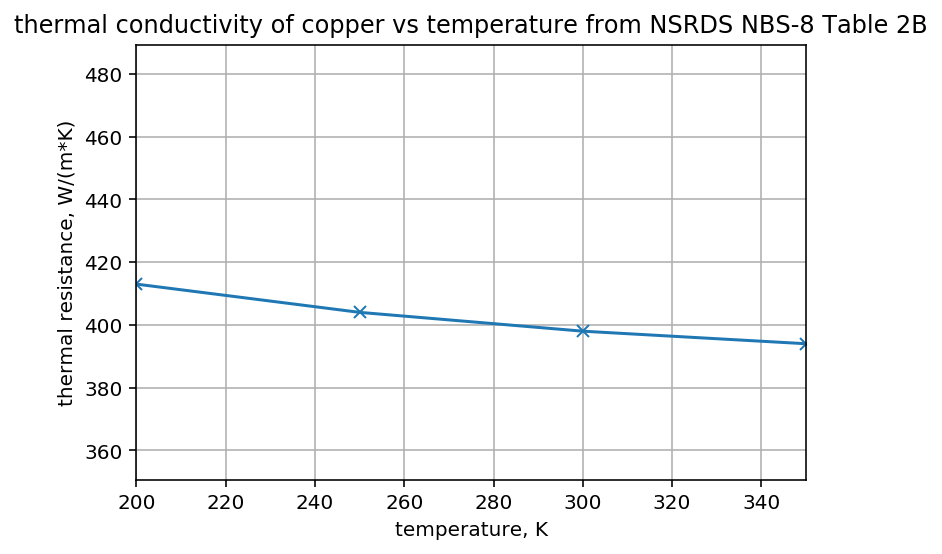

In [2]:
# thermal conductivity of copper vs temperature from NSRDS NBS-8 Table 2B
# various temperatures to be analyzed: 218.15 = -55C, 239.15 = -34C, 298.12 = 25C, 343.15k = 70C
cu_temp = np.array([100,150,200,250,300,350,400,500,600,700,800,900,1000])
k_cu_ary = np.array([483,428,413,404,398,394,392,388,383,377,371,364,357])
plt.plot(cu_temp,k_cu_ary,'-x')
plt.grid()
plt.title('thermal conductivity of copper vs temperature from NSRDS NBS-8 Table 2B')
plt.xlabel('temperature, K')
plt.ylabel('thermal resistance, W/(m*K)')
plt.xlim(200,350)
plt.show()

In [3]:
# find the average thermal conductivity across the range of interest, 200 to 350 K (-73.15 to 76.85 C)
t1_index = int(np.argwhere(cu_temp==200)[0])
t2_index = int(np.argwhere(cu_temp==350)[0])

k_cu_avg = k_cu_ary[t1_index:t2_index].sum()/len(k_cu_ary[t1_index:t2_index])

k_cu = k_cu_avg*ureg.watt/(ureg.meter*ureg.degK)  # copper thermal conductivity, W/(m*K)
print('average thermal conductivity = {:.1f}'.format(k_cu))
print('average thermal conductivity = {:.3f}'.format(k_cu.to(ureg.watt / ureg.degK / ureg.inch )))

average thermal conductivity = 405.0 watt / kelvin / meter
average thermal conductivity = 10.287 watt / inch / kelvin


In [4]:
# could interpolate k_cu values for temperature of interest
t_of_interest = (20+273.15)*ureg.degK
#t_of_interest.ito(ureg.degK)
k_cu_at_temp = np.interp(t_of_interest,cu_temp,k_cu_ary) # k_cu at a temperature
print('k_cu_at_temp = {:.3f}'.format(k_cu_at_temp))

k_cu_at_temp = 398.822


In [5]:
# amplifier bias
Vdd = 5*ureg.volt  # volts
Idd = 70*ureg.milliamp  # 70mA typical
P = Vdd*Idd
print('power dissapated = {:.2f}'.format(P.to('watt')))

# thermal conductivity, from datasheet
theta_jc = 53.4*ureg.degK/ureg.watt # Thermal Resistance, θjc channel to case, °C/W

power dissapated = 0.35 watt


In [6]:
# C-Band, amp is a QPL9503, Vdd=5V, Idd=56mA
num_ele = 1536
amps_per_ele = 6
P_cband = (5*ureg.volt)*(56*ureg.milliamp)
print('C-Band: power used by RF front end amps = {:.1f}'.format(num_ele*amps_per_ele*P_cband.to('watt')))

C-Band: power used by RF front end amps = 2580.5 watt


## Calculations for thermal via
Raytheon's spreadsheet: thermal via w/solderplug is 26||193 C/W.  Total for three vias is 7.747 C/W
via OD=0.01  
via ID=0.0072  
via plating = 0.0014  
via length=??  

Solder (63Sn-37Pb) - ASTM B 32 Grade Sn63  
Thermal Conductivity 	50.9 W/m-K @Temperature 0.000 - 180 °C  
http://www.matweb.com/search/datasheet.aspx?matguid=3a5c8bc670914d588b26ab0b994d88cb&ckck=1  

In [7]:
# thermal resistance of a via
via_length = 0.01*ureg.inch
via_length.ito(ureg.meter)  # convert variable inplace to meters

via_od = 0.01*ureg.inch # 14 mils via diameter
via_od.ito(ureg.meter) # inplace convert to meters
via_radius = via_od/2

via_id = 0.0072*ureg.inch # 14 mils via diameter
via_id.ito(ureg.meter) # inplace convert to meters

via_plating_thickness = (via_od-via_id)/2
print('via plating thickness = {:.4f}'.format(via_plating_thickness.to('inches')))

R_via = (via_length/k_cu)/(np.pi*(via_radius**2-(via_radius-via_plating_thickness)**2))
print('via thermal resistivity = {:.1f}'.format(R_via))
print()

# thermal conductivity of Sn63 solder
k_Sn63 = 50.9*ureg.watt/(ureg.meter*ureg.degK)  # Sn63 thermal conductivity, W/(m*K)
print('Solder (63Sn-37Pb) thermal conductivity = {:.1f}'.format(k_Sn63))
R_Sn63_plug = (via_length/k_Sn63)/(np.pi*(via_id/2)**2)
print('solder plug thermal resistivity = {:.1f}'.format(R_Sn63_plug))
print()

# via in parellel with solder plug
R_via_plug = R_via*R_Sn63_plug/(R_via+R_Sn63_plug)
print('thermal via thermal resistivity = {:.1f}'.format(R_via_plug))

via plating thickness = 0.0014 inch
via thermal resistivity = 25.7 kelvin / watt

Solder (63Sn-37Pb) thermal conductivity = 50.9 watt / kelvin / meter
solder plug thermal resistivity = 190.0 kelvin / watt

thermal via thermal resistivity = 22.6 kelvin / watt


## calculations for PCB laminate
RO4350B Laminate: Thermal Conductivity 0.69 W/m/°K at 80°C ASTM C518  

RO4350B materials are proprietary woven glass reinforced hydrocarbon/ceramics with electrical performance close to PTFE/woven glass and the manufacturability of epoxy/ glass.  Providing tight control on dielectric constant and low loss while utilizing the same processing method as standard epoxy/glass, RO4350B is available at a fraction of the cost of conventional microwave laminates. No special through-hole treatments or handling procedures are required as with PTFE based microwave materials.

Metal Claddings: Rolled and Electrodeposited  
Data sheets don't differenticat thermal conductivity for Rolled and Electrodeposited copper.  
Copper Thermal Conductivity W/(m•K) = 390  

In [8]:
# thermal conductivity of RO4350
k_RO4350 = 0.69*ureg.watt/(ureg.meter*ureg.degK)  # RO4350 thermal conductivity, W/(m*K)
print('thermal conductivity of RO4350 = {:.2f}'.format(k_RO4350))

# LNA thermal pad, length and width
LNA_pad_l = 0.7*ureg.mm
LNA_pad_l.ito(ureg.meter)
LNA_pad_w = 1.6*ureg.mm
LNA_pad_w.ito(ureg.meter)
LNA_pad_area = LNA_pad_l*LNA_pad_w  # area of thermal pad

LNA_pad_th = via_length # thickness of thermal pad

R_LNA_pad = LNA_pad_th/(k_RO4350*LNA_pad_area)  # thermal resistance of thermal pad
print('thermal resistance of RO4350 under LNA = {:.3f}'.format(R_LNA_pad))
print()

# combined thermal resistance to copper plane, include 3 thermal vias per LNA pad
R_via_plug_pcb = (R_via_plug/3)*R_LNA_pad/((R_via_plug/3)+R_LNA_pad)
print('combined thermal resistance of LNA to copper plane = {:.3f}'.format(R_via_plug_pcb))

thermal conductivity of RO4350 = 0.69 watt / kelvin / meter
thermal resistance of RO4350 under LNA = 328.675 kelvin / watt

combined thermal resistance of LNA to copper plane = 7.377 kelvin / watt


## calculations for copper plane
Assume LNA is centered in the cell.

In [9]:
# copper plane is same size as unit cell
lattice_dx = 1.3*ureg.inch
lattice_dx.ito(ureg.meter)  # convert variable inplace to meters
lattice_dy = 1.7*ureg.inch
lattice_dy.ito(ureg.meter)  # convert variable inplace to meters

# LNA distance to eggcrate
plane_len = lattice_dy/2 # 1/2 dy unit cell length
plane_thickness = 0.0014*ureg.inch # all copper is 1 oz, 0.0014" thick
plane_thickness.ito(ureg.meter)  # convert variable inplace to meters

plane_cross_area = lattice_dx*plane_thickness # cross section area

R_plane = (plane_len)/(k_cu*plane_cross_area)  # thermal resistance of ground plane mid-point to eggcrate
print('resistance of ground plane = {:.3f}'.format(R_plane))

resistance of ground plane = 45.400 kelvin / watt


Raytheon has a much difference value, need to reconcile the difference  
length and cross section area swapped in spreadsheet formula.  
not sure what material is being used for the plane.  36.01 maybe should be 400???

## calculations for cell wall
There are vias, solder plugs and PCB material connecting the copper plane to cell wall.  

Along perhiphery of unit cell thermal via spacing is 0.1"  
unit cell wall is 0.70" thick  
epoxy intreface between lattice and CCA  

Number of peripheral vias=43  

In [10]:
# PCB cell wall to eggcrate contact, length and width
Egg_pad_l = lattice_dx+lattice_dy
Egg_pad_w = 0.7*ureg.inch
Egg_pad_w.ito(ureg.meter)
Egg_pad_area = Egg_pad_l*Egg_pad_w  # contact area of eggcrate to unit cell wall

Egg_pad_th = via_length # thickness of PCB at eggcrate interface

R_Egg_pad = Egg_pad_th/(k_RO4350*Egg_pad_area)  # thermal resistance of PCB under eggcrate
print('thermal resistance of RO4350 under eggcrate = {:.3f}'.format(R_Egg_pad))

# combined thermal resistance of vias, solder plugs and PCB material, include thermal vias
n_vias = 43/2  # only half the vias are included in thermal circuit
R_via_plug_pcb1 = (R_via_plug/n_vias)*R_Egg_pad/((R_via_plug/n_vias)+R_Egg_pad)
print('combined thermal resistance of cell edge to eggcrate = {:.3f}'.format(R_via_plug_pcb1))

thermal resistance of RO4350 under eggcrate = 0.272 kelvin / watt
combined thermal resistance of cell edge to eggcrate = 0.216 kelvin / watt


## calculations for thermal epoxy
Thermal epoxy type not defined, spreadsheet gives 0.02 W/in*K.  

In [11]:
# thermal conductivity of epoxy
k_epoxy = 0.02*ureg.watt/(ureg.inch*ureg.degK)  # thermal conductivity, W/(in*K)
print('thermal conductivity of epoxy = {:.2f}'.format(k_epoxy))

# convert units
k_epoxy.ito(ureg.watt / ureg.degK / ureg.meter )
print('thermal conductivity of epoxy = {:.3f}'.format(k_epoxy))

thermal conductivity of epoxy = 0.02 watt / inch / kelvin
thermal conductivity of epoxy = 0.787 watt / kelvin / meter


## calculations for upper eggcrate
The pure Aluminum has a thermal conductivity of: 205 W/mK  
  
Thermal Conductivity of Aluminum Alloys  
Aluminium is a soft, light weight and shiny metal. It is ductile and corrosion resistant with high electrical conductivity. That is why it is mainly used for foil and conductor cables. Formation of aluminium alloys provides the higher strengths to metal. The strength to weight ratio of aluminum alloys is even more than steel. With atmospheric oxygen it forms a layer of oxide which resists further oxidation of metal. Thermal conductivity of some of aluminum alloys are listed below.  

| Aluminium alloys | Thermal conductivity (W/m-c) |
|:-----------------|:----------------------------:|
| Al-2024-T351 | 143 |
| Al-2024-T4 | 121.0 |
| Al-5052-H32 | 138.0 |
| Al-5052-O | 144.0 |
| Al-6061-O | 180.0 |
| Al-6061-T4 | 154.0 |
| Al-7075-T6 | 130.0 |
| Al-6061-T6 | 167.0 |
 
https://chemistry.tutorvista.com/physical-chemistry/thermal-conductivity-of-aluminium.html  

In [12]:
# thermal conductivity of Aluminum
k_al = 5.499*ureg.watt/(ureg.inch*ureg.degK)  # thermal conductivity, W/(in*K)  <<-- need to use value for aloy used
print('thermal conductivity of aluminum = {:.3f}'.format(k_al))

# convert units
k_al.ito(ureg.watt/ureg.degK/ureg.meter)
print('thermal conductivity of aluminum = {:.3f}'.format(k_al))

Eggcrate_l = lattice_dx+lattice_dy
Eggcrate_w = 0.7*ureg.inch
Eggcrate_w.ito(ureg.meter)
Eggcrate_area = Eggcrate_l*Eggcrate_w  # contact area of eggcrate

Upper_Eggcrate_th = 0.42*ureg.inch # thickness of upper eggcrate
Upper_Eggcrate_th.ito(ureg.meter)

R_Eggcrate_upper = Upper_Eggcrate_th/(k_al*Eggcrate_area)  # thermal resistance of upper eggcrate
print('thermal resistance of upper eggcrate = {:.3f}'.format(R_Eggcrate_upper))

thermal conductivity of aluminum = 5.499 watt / inch / kelvin
thermal conductivity of aluminum = 216.496 watt / kelvin / meter
thermal resistance of upper eggcrate = 0.036 kelvin / watt


In [13]:
# Lower Eggcrate
Eggcrate_l = lattice_dx+lattice_dy
Eggcrate_w = 0.7*ureg.inch
Eggcrate_w.ito(ureg.meter)
Eggcrate_area = Eggcrate_l*Eggcrate_w  # contact area of eggcrate

Lower_Eggcrate_th = 0.42*ureg.inch # thickness of upper eggcrate
Lower_Eggcrate_th.ito(ureg.meter)

R_Eggcrate_lower = Lower_Eggcrate_th/(k_al*Eggcrate_area)  # thermal resistance of upper eggcrate
print('thermal resistance of lower eggcrate = {:.3f}'.format(R_Eggcrate_lower))

thermal resistance of lower eggcrate = 0.036 kelvin / watt


need to use correct k value for alloy in frame.  

# calculations for Array Support Plate (ASP)

In [14]:
# Array Support Plate
Eggcrate_l = lattice_dx+lattice_dy
Eggcrate_w = 0.7*ureg.inch
Eggcrate_w.ito(ureg.meter)
Eggcrate_area = Eggcrate_l*Eggcrate_w  # contact area of eggcrate

asp_th = 0.08*ureg.inch # thickness of ASP
asp_th.ito(ureg.meter)

R_asp = asp_th/(k_al*Eggcrate_area)  # thermal resistance of ASP
print('thermal resistance of ASP = {:.3f}'.format(R_asp))

thermal resistance of ASP = 0.007 kelvin / watt


# calculations for Backshell

In [15]:
# Lower Eggcrate
Eggcrate_l = lattice_dx+lattice_dy
Eggcrate_w = 0.7*ureg.inch
Eggcrate_w.ito(ureg.meter)
Eggcrate_area = Eggcrate_l*Eggcrate_w  # contact area of eggcrate

Backshell_th = 0.08*ureg.inch # thickness of Backshell <<<-- need correct value
Backshell_th.ito(ureg.meter)

R_Backshell = Backshell_th/(k_al*Eggcrate_area)  # thermal resistance of upper eggcrate
print('thermal resistance of Backshell = {:.3f}'.format(R_Backshell))

thermal resistance of Backshell = 0.007 kelvin / watt


# calculations for Q-Pad II
Q-Pad II is a composite of aluminum foil coated on both sides with thermally / electrically conductive Sil-Pad rubber. The material is designed for those applications in which maximum heat transfer is needed and electrical isolation is not required. Q-Pad II is the ideal thermal interface material to replace messy thermal grease compounds. Q-Pad II eliminates problems associated with grease such as contamination of reflow solder or cleaning operations. Unlike grease, Q-Pad II can be used prior to these operations. Q-Pad II also eliminates dust collection which can cause possible surface shorting or heat buildup.  

Typical Use Temp: -60 to 180 (°C)  
Thickness 0.152 mm, ASTM D374  

| Pressure (psi) | 10 | 25 | 50 |
|:---------------|:--:|:--:|:--:|
| Thermal Impedance (°C-$in^2/W$) | 0.52 | 0.30 | 0.22 |


In [16]:
# thermal conductivity of Q-Pad II
Timp_Q_pad = 0.52*ureg.degK*ureg.inch**2/ureg.watt  # thermal impedance, C*in^2/W at 10psi
print('thermal impedance of Q-Pad II = {:.2f}'.format(Timp_Q_pad))

# convert units
Timp_Q_pad.ito(ureg.degK*ureg.meter**2/ureg.watt )
print('thermal impedance of Q-Pad II = {:.3e}'.format(Timp_Q_pad))

# use contact area of eggcrate to calculate thermal resistance
R_Q_pad = Timp_Q_pad/Eggcrate_area
print('thermal resistance of Q-Pad II = {:.3f}'.format(R_Q_pad))

thermal impedance of Q-Pad II = 0.52 inch ** 2 * kelvin / watt
thermal impedance of Q-Pad II = 3.355e-04 kelvin * meter ** 2 / watt
thermal resistance of Q-Pad II = 0.248 kelvin / watt


# calculations for width of microstrip line

$w=\frac {7.48h}{e^{Z_0 \frac{\sqrt{er+1.41}}{87}}}-1.25t$  

Z0 = Single Ended Impedance  
w = Width  
t = Trace Thickness  
h = Dielectric Thickness  
εr = Relative Dielectric Constant  

Example,  
If Z0 = 60 Ω, t = 1.2 mils, h = 4.2 mils and εr = 3.8 then  
width = 5.004 mils  

https://www.everythingrf.com/rf-calculators/microstrip-width-calculator

In [17]:
Z0 = 50
t = 0.0014*ureg.inch
h = 0.01*ureg.inch
er = 3.66

w = (7.48*h)/(np.exp(Z0*np.sqrt(er+1.41)/87))-1.25*t
print('microstrip width for 50 ohms = {:.3f}'.format(w.to(ureg.mil)))

microstrip width for 50 ohms = 18.757 thou


Microstrip width seems reasonable.

# calculations for heat sink
Heat Sink Thermal Performance in Forced Convection Applications is heavily dependant on Heat Sink Surface Area. In fact the main purpose of a Heat Sink is to increase the surface area “exposed” to the air flowing in the area of the device being cooled – effectively removing the heat by convection heat transfer.  

Extrusion Profile: Wakefield Vette, 11 fins  
Shape #: 19036  
Width: 5.596  
Height: 2.5  
Perimeter: 65.83  
Material: 6063-T5 Aluminum  

## Properties of air at 1 atmosphere
Select data taken from Table A-15, page 874.

In [18]:
air_temp = np.array([-100,-50,-40,-30,-20,-10,0,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,120],dtype=float)
thermal_conduc = np.array([.01582,.01979,.02057,.02134,.02211,.02288,.02364,.02401,.02439,.02476,.02514,
    .02551,.02588,.02625,.02662,.02699,.02735,.02808,.02881,.02953,.03024,.03095,.03235])
kinem_visc = np.array([.5837,.9319,1.008,1.087,1.169,1.252,1.338,1.382,1.426,1.470,1.516,1.562,1.608,
    1.655,1.702,1.750,1.798,1.896,1.995,2.097,2.201,2.306,2.522])*1e-5
Prandle_num = np.array([.7263,.7440,.7436,.7425,.7408,.7387,.7362,.7350,.7336,.7323,.7309,.7296,.7282,
    .7268,.7255,.7241,.7228,.7202,.7177,.7154,.7132,.7111,.7073])
air_density = np.array([2.038,1.582,1.514,1.451,1.394,1.341,1.292,1.269,1.246,1.225,1.204,1.184,1.164,
    1.145,1.127,1.109,1.092,1.059,1.028,.9994,.9718,.9458,.8977])
spec_heat = np.array([966,999,1002,1004,1005,1006,1006,1006,1006,1007,1007,1007,1007,1007,1007,1007,
    1007,1007,1007,1008,1008,1009,1011],dtype=float)

## temperature and pressure of air vs altitude
Altitudes of interest is 0 to 45kft (13716 m).  

In [19]:
alt = np.linspace(0, 50000, num=30, endpoint=True)
T = np.zeros(len(alt))  # temperature, units of degrees C
rho = np.zeros(len(alt))   # pressure as a function of temperature, units of kPa

# calculate the pressure and temperature as a function of altitude
for i in range(len(alt)):
    if alt[i] <= 11000:  # The troposphere runs from the surface of the Earth to 11,000 meters.
        T[i] =  15.04 - .00649 * alt[i]
        rho[i] = 101.29 * ((T[i] + 273.1)/288.08)**5.256
    if (alt[i] > 11000) and (alt[i] <= 25000): #The lower stratosphere runs from 11,000 meters to 25,000 meters
        T[i] = -56.46  # a constant
        rho[i] = 22.65 * np.exp(1.73 - .000157 * alt[i])
    if alt[i] > 25000:  # The upper stratosphere model is used for altitudes above 25,000 meters.
        T[i] = -131.21 + 0.00299 * alt[i]
        rho[i] = 2.488 * ((T[i] + 273.1)/ 216.6)**-11.388

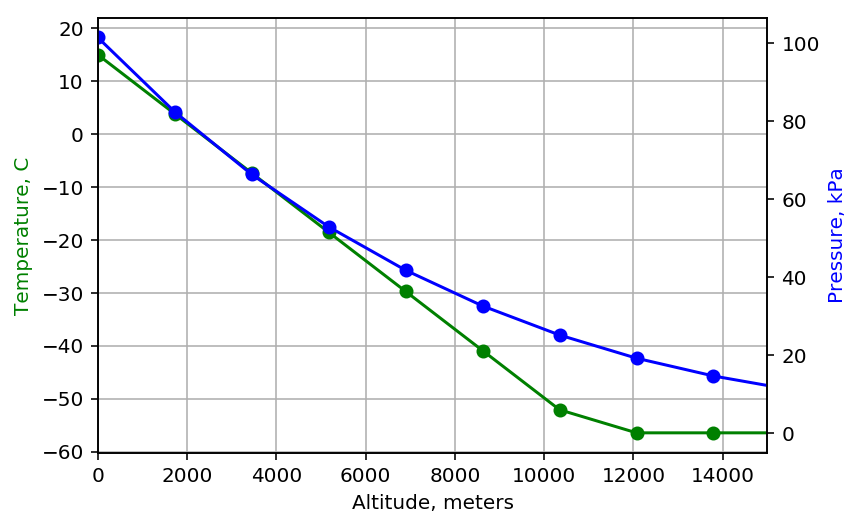

In [20]:
# plot the temperature and pressure vs altitude
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alt, T,'g-o')
ax2.plot(alt, rho,'b-o')
ax1.set_xlabel('Altitude, meters')
ax1.set_ylabel('Temperature, C', color='g')
ax2.set_ylabel('Pressure, kPa', color='b')
ax1.grid()  # put grid marks on temperature axis
plt.xlim(0,15000)
plt.show()

## Calculate air flow rate
Fan: Amtek Rotrom 41.7 cfm derated by 40%  
Part Number: 011042000  
Physical envelope: 3.12” x 3.12” x 1.50”  
Air Flow (CFM): 41.7  
Power (Watts): 4.42  

In [21]:
# Fan specification
fan_CFM = 41.7*ureg.ft**3/ureg.minute
print('air flow = {:.3f}'.format(fan_CFM))
# change units
V_dot = fan_CFM.to(ureg.meter**3/ureg.second)
print('volume flow rate = {:.3f}'.format(V_dot))

air flow = 41.700 foot ** 3 / minute
volume flow rate = 0.020 meter ** 3 / second


In [22]:
altitude = 13716
T_air = np.interp(altitude,alt,T) # temperature of air
print('T_air = {:.3f}'.format(T_air))

P_air = np.interp(altitude,alt,rho)*ureg.kPa # pressure of air
print('P_air = {:.3f}'.format(P_air))

T_air = -56.460
P_air = 14.857 kilopascal


In [23]:
# find air velocity
fan_dia = 3.12*ureg.inch
fan_dia.ito(ureg.meter)
fan_area = np.pi*(fan_dia/2)**2
air_vel = V_dot/fan_area
print('air velocity = {:.3f}'.format(air_vel))

air velocity = 3.990 meter / second


In [24]:
# calculate Reynolds number
# air flow is parallel to the fins, L=lattice_dx, find kinematic viscosity
v = np.interp(T_air,air_temp,kinem_visc)*ureg.meter**2/ureg.second # at 1 atm
v = v/P_air.to(ureg.atm).magnitude # scale for pressure, convert pressure to atm

L = lattice_dy
Re_L = air_vel*L/v # Reynolds at end of heat sink
print('Reynolds number = {:.3e}'.format(Re_L))

# look up Prandtl number for air temperature
Pr = np.interp(T_air,air_temp,Prandle_num)  # Prandtl number, see table A-15
print('Prandtl number = {:.3f}'.format(Pr))

Reynolds number = 2.848e+03 dimensionless
Prandtl number = 0.742


To determine the heat transfer coefficient acting upon the fins, equation 19 from [1] is used.  

$Nu = \Biggl [ \frac {1}{(Re*Pr/2)^3} + \frac{1}{(0.664 \sqrt {Re}Pr^{0.33}\sqrt{1+3.65 \sqrt{Re}})^3} \Biggr ]^{-0.33}$  

I still need to read the paper more thoroughly to determin the range of Re and Pr the equation is valid over.  For now just assume it's OK.  

1) Teertstra, P., Yovanovich, M.M., and Culham, J.R., “Analytical Forced Convection Modeling of Plate Fin Heat Sinks,” Proceedings of 15th IEEE Semi-Therm Symposium, pp. 34-41, 1999.

In [26]:
# calculate Nesselt number using refernce 1
Nu = ( 1/(Re_L*Pr/2)**3 + 1/(0.664*np.sqrt(Re_L)*Pr**0.33*np.sqrt(1+3.65*np.sqrt(Re_L)))**3 )**-0.33
print('Nusselt number = {:.1f}'.format(Nu))

Nusselt number = 412.5 dimensionless


In [31]:
# get thermal conductivity of air
k = np.interp(T_air,air_temp,thermal_conduc)*ureg.watts/(ureg.meter*ureg.degK) # independent of pressure
h = (k/L)*Nu
print('heat transfer coefficient = {:.3f}'.format(h))

# area
w = 60*ureg.inch # heat sink profile perimeter, just using a round number here
w.ito(ureg.meter)
As = L*w
print('area = {:.3f}'.format(As.to(ureg.inch**2)))

# heat sink thermal resistance
R_hs = 1/(h*As)
print('heat sink thermal resistance = {:.3f}'.format(R_hs))

heat transfer coefficient = 184.136 watt / kelvin / meter ** 2
area = 102.000 inch ** 2
heat sink thermal resistance = 0.083 kelvin / watt


The thermal resistance calculated here is much different that what Raytheon uses in the spread sheet.  

### weight of heatsink

In [32]:
hs_weight = 6.5*ureg.pound/ureg.foot       # pounds per foot of heat sink excrusion
hs_weight.ito(ureg.pound/ureg.inch)

weight = hs_weight*lattice_dx.to(ureg.inch)
print('heat sink weight = {:.3f}'.format(weight))

heat sink weight = 0.704 pound


Weight of heatsinks will be a problem.

## Heat sink example calculations
Calculations from paper as an example. Need to convert units to BTU, pound, foot, F and hour.

In [2]:
Hc = 1.88*ureg.btu/(ureg.hour*ureg.foot**2*ureg.delta_degF) # heat transfer coefficient
K = 0.014*ureg.btu/(ureg.hour*ureg.delta_degF*ureg.foot) # thermal conductivity of air at 77 deg F
Cp = 0.241*ureg.btu/(ureg.pound*ureg.delta_degF) # specific heat at 77 deg F
Dv = 0.044*ureg.pound/(ureg.hour*ureg.foot) # dynamic viscosity of air at 77 deg F
D = 0.075*ureg.pound/ureg.foot**3 # Density of air
V = 400*ureg.foot/ureg.hour # velocity of air
L = 10*ureg.inches # extrusion length of the heat sink

Stanton_Number = Hc / D * Cp * V
Prandtl_Number = Cp * Dv / K
Reynolds_Number = D * V * L.to(ureg.foot) / Dv

extrusion_surface_area = 132.3*ureg.inch**2/ureg.inch # square inches per linear inch of extrusion
A = extrusion_surface_area*L
print('heat sink area = {:f}'.format(A))
A.ito(ureg.foot**2)
print('heat sink area = {:f}'.format(A))
print()

thermal_transfer_coefficient = 1/(Hc*A)

print('Stanton_Number = {:.3f}'.format(Stanton_Number))
print('Prandtl_Number = {:.3f}'.format(Prandtl_Number))
print('Reynolds_Number = {:.3f}'.format(Reynolds_Number))
print()
print('thermal_transfer_coefficient = {:.3f}'.format(thermal_transfer_coefficient))

thermal_transfer_coefficient.ito(ureg.delta_degC/ureg.watt)
print('thermal_transfer_coefficient = {:.3f}'.format(thermal_transfer_coefficient))

heat sink area = 1323.000000 inch ** 2
heat sink area = 9.187500 foot ** 2

Stanton_Number = 2416.427 btu ** 2 * foot ** 2 / delta_degF ** 2 / hour ** 2 / pound ** 2
Prandtl_Number = 0.757 dimensionless
Reynolds_Number = 568.182 dimensionless

thermal_transfer_coefficient = 0.058 delta_degF * hour / btu
thermal_transfer_coefficient = 0.110 delta_degC / watt


See reference for calculation of fin heatsink  

In [7]:
Re = Reynolds_Number
Pr = Prandtl_Number
Nu = ( 1/(Re*Pr/2)**3 + 1/(0.664*np.sqrt(Re)*Pr**0.33*np.sqrt(1+3.65*np.sqrt(Re)))**3 )**-0.33-0.33
print('Nusselt number = {:.1f}'.format(Nu))

Nusselt number = 119.8 dimensionless


In [8]:
St = Nu/(Reynolds_Number*Prandtl_Number)
print('Stanton number = {:f}'.format(St))

Stanton number = 0.278464 dimensionless


In [9]:
h = St*D*V*Cp
print('heat transfer coefficient = {:f}'.format(h))

heat transfer coefficient = 2.013297 btu / delta_degF / foot ** 2 / hour


In [10]:
R_hs = 1/(h*A)
print('heat sink thermal resistance = {:.3f}'.format(R_hs))
R_hs.ito(ureg.delta_degC/ureg.watt)
print('heat sink thermal resistance = {:.3f}'.format(R_hs))

heat sink thermal resistance = 0.054 delta_degF * hour / btu
heat sink thermal resistance = 0.102 delta_degC / watt


Answer is about the same as the heat sink paper.  

## OLD CODE

#### Average Nusselt number
From page 374 of Heat Transfer Book.  Equations 7-21 and 7-22.  
Laminar:  
$Nu = \frac{hL}{k} = 0.664 Re_L^{0.5}*Pr^{1/3} \quad \text{for} \quad Re_L \lt 5\text{x}10^5 \\[2ex]$   

Turbulent:  
$Nu = \frac{hL}{k} = 0.037 Re_L^{0.8}*Pr^{1/3} \quad \text{for} \quad 5\text{x}10^5 \leq Re_L \leq 5\text{x}10^5 \quad \text{and} \quad  0.6 \leq Pr \leq 60 \\[2ex]$   

In [25]:
# look up Prandtl number for air temperature
Pr = np.interp(T_air,air_temp,Prandle_num)  # Prandtl number, see table A-15
print('Prandtl number = {:.3f}'.format(Pr))

# calculate Nusselt number
if Re_L < 5e5:
    print('flow is laminar')
    Nu = (0.664*Re_L**0.5)*Pr**(1/3)  # see page 374 for this equation


elif Re_L >= 5e5 and Re_L <= 1e7 and Pr >= 0.6 and Pr <= 60:
    print('flow is turbulent')
    Nu = (0.037*Re_L**0.8)*Pr**(1/3)  # see page 374 for this equation

else:
    print('Re_L or Pr is outside valid limits for equation')

print('Nusselt number = {:.1f}'.format(Nu))

Prandtl number = 0.742
flow is laminar
Nusselt number = 32.1 dimensionless
